### Name - Nyan Hein   
### Class - DAAA-FT-1B-01
### Admission number - 2340911
### Programming for data analysis module CA2 Assignment 

### Problem Statement - How employment of graduates in IT industry in Singapore are influenced by GDP growth rate of Singpore, job vacancy and the university that they are graduated from?

**To do the analysis, first I used the dataset of GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv which contains the data column of year graduated, school(like school of computing), degree, employment rate overall, employment rate for permanent job,basic monthly salary(both for mean and median), gross monthly salary (for mean, median, 25th percentile and 75percentile) for five universities(NTU,NUS,SIT,SMU,SUSS and SUTD)**

In [1]:
import pandas as pd 
df_graduates = pd.read_csv('./datasets/GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD.csv')
## Link of the data set - https://beta.data.gov.sg/collections/415/view


In [2]:
#importing libararies for data visualization 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# writing a function to describe the number of columns and rows,name of the columns, number of duplicate rows and index,
#the data types of each column,
#the number of null values in each column and the top three rows  of each data set. 


def describeDataSet(dframe):
    print(f'Number of rows: {dframe.shape[0]}\nNumber of columns: {dframe.shape[1]}\n')
    print(f'Column Names are:')
    names = list(dframe.columns);
    for num,name in enumerate(names):
        print(f'{num+1}. {name}')
    df_duplicated = dframe[dframe.duplicated()]
    if(df_duplicated.shape[0]==0):
        print('\nThis data set has no duplicate rows.\n')
    else:
        print(f'\nThe index(s) of duplicate rows {list(df_duplicated.index)}\n')
    print(f'The data type of this data set are \n{dframe.dtypes}\n')
    print(f'The number of null values\n{dframe.isnull().sum()}\n')
    print(f'The top three rows of data set are:\n{dframe.head(3)}')

# Analyzing the dataset of Graduate Employment Rate by NTU,NUS,SIT,SMU,SUSS,SUTD

In [4]:
describeDataSet(df_graduates)
## Text based analysis of data set is as follows: 

Number of rows: 1121
Number of columns: 12

Column Names are:
1. year
2. university
3. school
4. degree
5. employment_rate_overall
6. employment_rate_ft_perm
7. basic_monthly_mean
8. basic_monthly_median
9. gross_monthly_mean
10. gross_monthly_median
11. gross_mthly_25_percentile
12. gross_mthly_75_percentile

This data set has no duplicate rows.

The data type of this data set are 
year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object

The number of null values
year                         0
university                   0
school                       0
degree                       0
employment_rate_o

In [5]:
print(df_graduates['employment_rate_overall'].dtype)

object


**An important thing to note from this data set is that employment rate and monthly salary columns has object data type, although they should be numerical values. This may be because this column has both numerical values and 'na' values' as null values.**

**So I will change those 'na' string values to null values**

In [6]:
df_graduates.replace('na', None, inplace=True)

In [7]:
describeDataSet(df_graduates)

Number of rows: 1121
Number of columns: 12

Column Names are:
1. year
2. university
3. school
4. degree
5. employment_rate_overall
6. employment_rate_ft_perm
7. basic_monthly_mean
8. basic_monthly_median
9. gross_monthly_mean
10. gross_monthly_median
11. gross_mthly_25_percentile
12. gross_mthly_75_percentile

This data set has no duplicate rows.

The data type of this data set are 
year                          int64
university                   object
school                       object
degree                       object
employment_rate_overall      object
employment_rate_ft_perm      object
basic_monthly_mean           object
basic_monthly_median         object
gross_monthly_mean           object
gross_monthly_median         object
gross_mthly_25_percentile    object
gross_mthly_75_percentile    object
dtype: object

The number of null values
year                          0
university                    0
school                       28
degree                        0
employment_ra

**Now, I can see the null values, in the columns but the data type is still objects. So, I will convert those to numerical values**

In [8]:
df_graduates.iloc[:, 4:12] = df_graduates.iloc[:, 4:12].apply(pd.to_numeric)
## The above code does not work 

### Changing the columns for employment rates and salary columns to numerical values

In [9]:
columns_to_convert = df_graduates.columns[4:12]

# Loop through the specified columns and convert them to numeric
for col in columns_to_convert:
    df_graduates[col] = pd.to_numeric(df_graduates[col], errors='coerce')


In [10]:
describeDataSet(df_graduates)

Number of rows: 1121
Number of columns: 12

Column Names are:
1. year
2. university
3. school
4. degree
5. employment_rate_overall
6. employment_rate_ft_perm
7. basic_monthly_mean
8. basic_monthly_median
9. gross_monthly_mean
10. gross_monthly_median
11. gross_mthly_25_percentile
12. gross_mthly_75_percentile

This data set has no duplicate rows.

The data type of this data set are 
year                           int64
university                    object
school                        object
degree                        object
employment_rate_overall      float64
employment_rate_ft_perm      float64
basic_monthly_mean           float64
basic_monthly_median         float64
gross_monthly_mean           float64
gross_monthly_median         float64
gross_mthly_25_percentile    float64
gross_mthly_75_percentile    float64
dtype: object

The number of null values
year                          0
university                    0
school                       28
degree                        0
e

**Now, the numerical columns has only numerical values and null values** 

In [11]:
print(df_graduates['university'].unique())
## finding the unique value of university column

['Nanyang Technological University' 'National University of Singapore'
 'Singapore Management University' 'Singapore Institute of Technology'
 'Singapore University of Technology and Design'
 'Singapore University of Social Sciences']


**Now I will focus on NTU,NUS,SMU and SIT. I will ignore the the SUTD and SUSS because according to the source of data(https://beta.data.gov.sg/collections/415/view)
the data records of that data only start from 2015. So, I will omit those two universities from my analysis**

**Since there are too many records to handle for all the universities at once, I will separate the data set into different universities set and I will use only use employment_rate_overall for employment rate and  will drop other columns.**

In [12]:
## I will first drop the unnecessary columns
columns_toDrop = ['employment_rate_ft_perm','basic_monthly_median','gross_monthly_mean','gross_monthly_median','gross_mthly_25_percentile','gross_mthly_75_percentile','basic_monthly_mean']
df_graduates_droppingColumns = df_graduates.drop(columns=columns_toDrop)
## creating four different datasets 
df_NUS = df_graduates_droppingColumns[df_graduates['university']=='National University of Singapore'].reset_index(drop=True)
df_NTU = df_graduates_droppingColumns[df_graduates['university']=='Nanyang Technological University'].reset_index(drop=True)
df_SMU = df_graduates_droppingColumns[df_graduates['university']=='Singapore Management University'].reset_index(drop=True)
df_SIT = df_graduates_droppingColumns[df_graduates['university']=='Singapore Institute of Technology'].reset_index(drop=True)

### Handling NULL values for the four data sets 

**Finding null values for the four data sets**

In [13]:
dfs = [df_NUS,df_NTU,df_SMU,df_SIT]
## defining the fucntion to show the null values
def showNullValues(dataset):
    print(f'Null Values of data set for {dataset.at[0,"university"]}:\n {dataset.isnull().sum()}\n')
for df in dfs:
    showNullValues(df)


Null Values of data set for National University of Singapore:
 year                        0
university                  0
school                      0
degree                      0
employment_rate_overall    37
dtype: int64

Null Values of data set for Nanyang Technological University:
 year                        0
university                  0
school                      0
degree                      0
employment_rate_overall    36
dtype: int64

Null Values of data set for Singapore Management University:
 year                       0
university                 0
school                     0
degree                     0
employment_rate_overall    0
dtype: int64

Null Values of data set for Singapore Institute of Technology:
 year                        0
university                  0
school                      0
degree                      0
employment_rate_overall    13
dtype: int64



**So null values can only be seen in employment_rate_overall and I will first find the distribution of employment_rate_overall for four universities by using the boxplots**

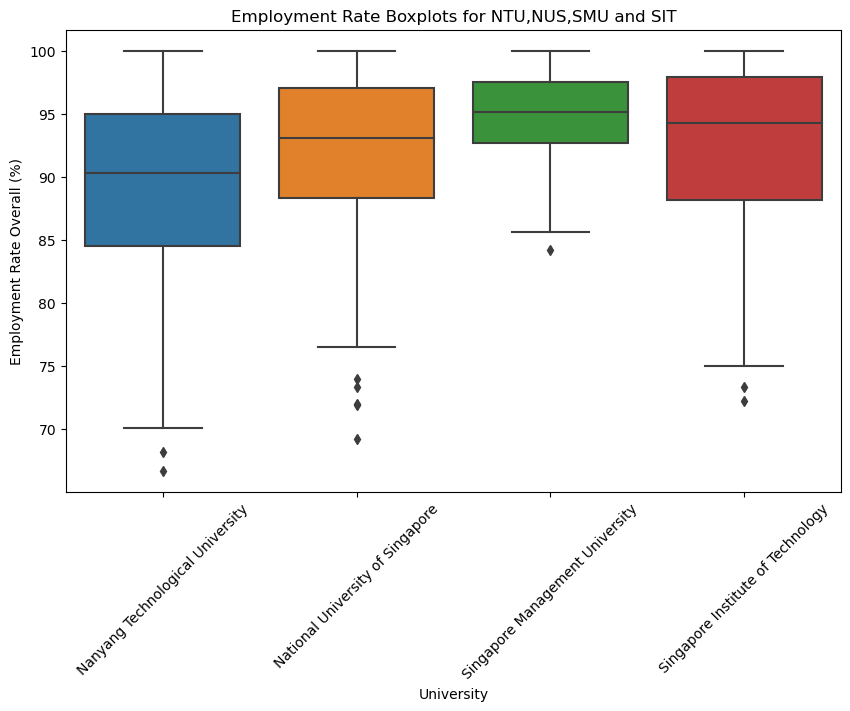

In [14]:
universities = ['Nanyang Technological University', 'National University of Singapore', 'Singapore Management University', 'Singapore Institute of Technology']
df_filtered_fourUni = df_graduates_droppingColumns[df_graduates_droppingColumns['university'].isin(universities)]

# Creating boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered_fourUni, x='university', y='employment_rate_overall')
plt.xticks(rotation=45) 
plt.title('Employment Rate Boxplots for NTU,NUS,SMU and SIT')
plt.xlabel('University')
plt.ylabel('Employment Rate Overall (%)')
plt.show()


### Analysis of the four boxplots 
**From the analysis of the boxplots, the SMU has highest employment rate overall and all four universities seem to have negatively skewed distribution in employment rate. For the outliers, NTU and SIT has only two outliers and SMU has only one ouliers so I will used the mean to fill the null values because they will not have much affected by the outliers because the outliers in those three universities are not that extereme and there are only one or two outliers. But for NUS there are many outliers so I will use median which is not affected by the outliers.**

In [ ]:
**Indentify outliers** 

In [15]:
## filling null values using mean for NTU and SIT, SMU has no null values
df_NTU['employment_rate_overall'].fillna(df_NTU['employment_rate_overall'].mean(),inplace=True)
df_SIT['employment_rate_overall'].fillna(df_SIT['employment_rate_overall'].mean(),inplace=True)
## fillin null values using median for NUS
df_NUS['employment_rate_overall'].fillna(df_NUS['employment_rate_overall'].median(),inplace=True)

In [16]:
for df in [df_NUS,df_NTU,df_SMU,df_SIT]:
    showNullValues(df)

Null Values of data set for National University of Singapore:
 year                       0
university                 0
school                     0
degree                     0
employment_rate_overall    0
dtype: int64

Null Values of data set for Nanyang Technological University:
 year                       0
university                 0
school                     0
degree                     0
employment_rate_overall    0
dtype: int64

Null Values of data set for Singapore Management University:
 year                       0
university                 0
school                     0
degree                     0
employment_rate_overall    0
dtype: int64

Null Values of data set for Singapore Institute of Technology:
 year                       0
university                 0
school                     0
degree                     0
employment_rate_overall    0
dtype: int64



**From the above text, there is no null values in all of NUS,NTU, SMU and SIT.**

### Handling the outliers 

In [246]:
## defining a fucntion to remove outliers 
def removeOutliers(dataset):
    ## Calculating Q1, Q3, and IQR
    Q1 = dataset['employment_rate_overall'].quantile(0.25)
    Q3 = dataset['employment_rate_overall'].quantile(0.75)
    IQR = Q3 - Q1

    ## limting for outliers
    lowerLimit = Q1 - (1.5 * IQR)
    upperLimit = Q3 + (1.5 * IQR)
    # Filter out outliers and keep only valid data points
    return dataset[(dataset['employment_rate_overall'] > lowerLimit) & (dataset['employment_rate_overall'] < upperLimit)]


In [247]:
dfs=[df_NUS,df_NTU,df_SMU,df_SIT]
## applying the function to each data set in the array 
dfs_outliersRemoved = [removeOutliers(df) for df in dfs]
df_NUS,df_NTU,df_SMU,df_SIT = dfs_outliersRemoved

## Visualizing the data again to make sure outliers are removed

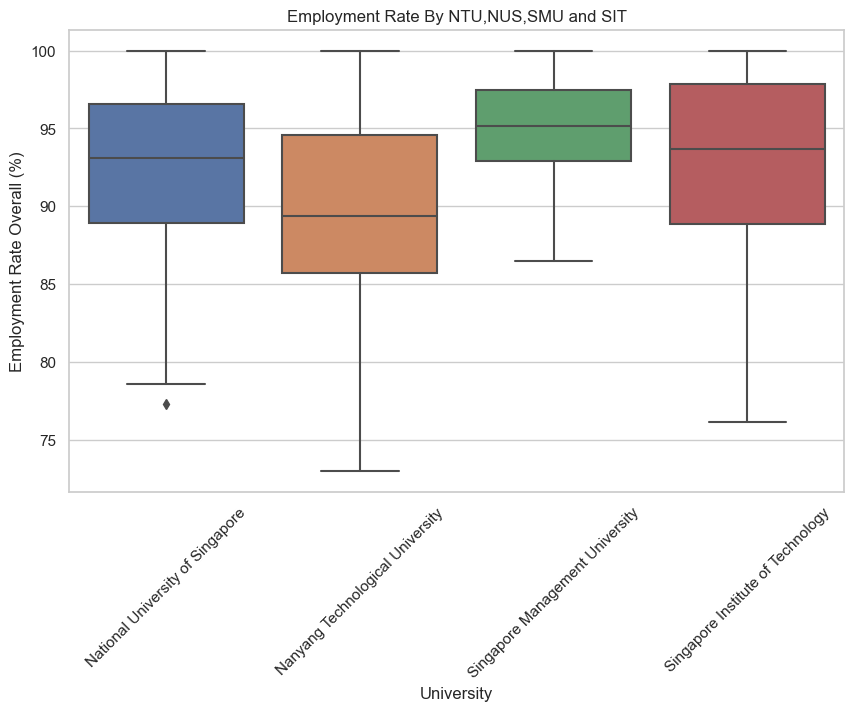

In [248]:
df_combined__to_Identify_RemovalofOutliers = pd.concat([df_NUS, df_NTU, df_SMU, df_SIT])

# Step 2: Plot the combined DataFrame
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.boxplot(x='university', y='employment_rate_overall', data=df_combined__to_Identify_RemovalofOutliers)

plt.title('Employment Rate By NTU,NUS,SMU and SIT')
plt.xlabel('University')
plt.ylabel('Employment Rate Overall (%)')
plt.xticks(rotation=45)
plt.show()

In [237]:
df_NUS,df_NTU,df_SMU,df_SIT = dfs_outliersRemoved

**Since the focus of the analysis question is for IT industry, I will get the employment rate data concerning to the school of computing or degrees concerned with IT industry.**

In [17]:
### finding the unique values of school column
def showUniqueSchools(dataset):
    print(f"Uniuqe Values of school column of {dataset.at[0,'university']}:\n\n {dataset['school'].unique()} ")

**For NUS**

In [18]:
## for NUS 
showUniqueSchools(df_NUS)

Uniuqe Values of school column of National University of Singapore:

 ['Faculty of Arts & Social Sciences' 'NUS Business School'
 'School of Computing' 'Faculty of Dentistry'
 'School of Design & Environment' 'Faculty of Engineering'
 'Faculty of Law' 'YLL School of Medicine'
 'Yong Siew Toh Conservatory of Music' 'Faculty of Science'
 'Multi-Disciplinary Programme' 'Faculty Of Dentistry'
 'Faculty Of Engineering' 'Yong Loo Lin School (Medicine)'
 'YST Conservatory Of Music' 'Yale-NUS College'
 'Multi-Disciplinary Programmes' 'Multidisciplinary Programmes'
 'YST Conservatory of Music'] 


**So, I will extract the rows of SOC for NUS**

In [19]:
df_NUS_IT = df_NUS[df_NUS['school']=='School of Computing']
df_NUS_IT.head(10)

,year,university,school,degree,employment_rate_overall
7,2013,National University of Singapore,School of Computing,Bachelor of Computing (Communications and Media),88.9
8,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computational Biology) **,93.1
9,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,93.1
10,2013,National University of Singapore,School of Computing,Bachelor of Computing (Computer Science),92.4
11,2013,National University of Singapore,School of Computing,Bachelor of Computing (Electronic Commerce),88.9
12,2013,National University of Singapore,School of Computing,Bachelor of Computing (Information Systems),89.2
46,2014,National University of Singapore,School of Computing,Bachelor of Computing (Communications and Media),82.1
47,2014,National University of Singapore,School of Computing,Bachelor of Computing (Computational Biology) **,93.1
48,2014,National University of Singapore,School of Computing,Bachelor of Computing (Computer Engineering) **,93.1
49,2014,National University of Singapore,School of Computing,Bachelor of Computing (Computer Science),90.6


**After that, I will group the data by year by calculating the mean for each year**

In [20]:
df_NUS_IT = df_NUS_IT.groupby('year')[['employment_rate_overall']].mean().reset_index()
df_NUS_IT.rename(columns={'employment_rate_overall':'NUS'},inplace=True)
df_NUS_IT.head()

,year,NUS
0,2013,90.933333
1,2014,90.016667
2,2015,93.883333
3,2016,94.125000
4,2017,94.000000


### For NTU 

In [21]:
showUniqueSchools(df_NTU)

Uniuqe Values of school column of Nanyang Technological University:

 ['College of Business (Nanyang Business School)' 'College of Engineering'
 'College of Humanities, Arts & Social Sciences' 'College of Sciences'
 'National Institute of Education (NIE)' 'Sports Science and Management'
 'Lee Kong Chian School of Medicine' 'College of Science'] 


**NTU does not have shcool of computing of school like NUS or school of information systems like SMU. So to get the employment rate of IT industry from NTU, I will use degre column**

**Filtering rows which contains the word information engineering or computer science because these are the 
only degrees I see in NTU related to IT industry**

In [22]:
## filtering rows which contains the word information engineering or computer science because these are the 
## only degrees I see related to IT industry
df_NTU_IT = df_NTU[df_NTU['degree'].str.contains('information engineering|computer science', case=False, na=False)]

In [23]:
df_NTU_IT.head()

,year,university,school,degree,employment_rate_overall
9,2013,Nanyang Technological University,College of Engineering,Computer Science,92.1
12,2013,Nanyang Technological University,College of Engineering,Information Engineering and Media,85.7
43,2014,Nanyang Technological University,College of Engineering,Computer Science,94.5
46,2014,Nanyang Technological University,College of Engineering,Information Engineering and Media,85.7
80,2015,Nanyang Technological University,College of Engineering,Computer Science,92.4


In [24]:
## Groupping the data by year by mean of employment rate
df_NTU_IT = df_NTU_IT.groupby('year')[['employment_rate_overall']].mean().reset_index()

In [25]:
## renaming the column
df_NTU_IT.rename(columns={'employment_rate_overall':'NTU'},inplace=True)

In [26]:
df_NTU_IT

,year,NTU
0,2013,88.900000
1,2014,90.100000
2,2015,89.697612
3,2016,94.600000
4,2017,92.173209
5,2018,93.800000
6,2019,94.050000
7,2020,94.100000
8,2021,96.350000


**For SMU**

In [27]:
showUniqueSchools(df_SMU)

Uniuqe Values of school column of Singapore Management University:

 ['School of Accountancy (4-years programme) *'
 'School of Business (4-years programme) *'
 'School of Economics (4-years programme) *'
 'School of Information Systems (4-years programme) *'
 'School of Social Sciences (4-years programme) *'
 'School of Law (4-years programme) *'
 'School of Accountancy (4-year programme) *'
 'School of Business (4-year programme) *'
 'School of Economics (4-year programme) *'
 'School of Information Systems (4-year programme) *'
 'School of Social Sciences (4-year programme) *'
 'School of Law (4-year programme) *'] 


**correcting the typo error of unique values of shcool column**

In [28]:
df_SMU['school'] = df_SMU['school'].str.replace('School of Information Systems (4-years programme) *','School of Information Systems (4-year programme) *')

In [29]:
showUniqueSchools(df_SMU)

Uniuqe Values of school column of Singapore Management University:

 ['School of Accountancy (4-years programme) *'
 'School of Business (4-years programme) *'
 'School of Economics (4-years programme) *'
 'School of Information Systems (4-year programme) *'
 'School of Social Sciences (4-years programme) *'
 'School of Law (4-years programme) *'
 'School of Accountancy (4-year programme) *'
 'School of Business (4-year programme) *'
 'School of Economics (4-year programme) *'
 'School of Social Sciences (4-year programme) *'
 'School of Law (4-year programme) *'] 


**Extracting the rows with 'School of Information Systems (4-year programme) ' and grouping the data by year by mean of employment rate for SMU**

In [30]:
df_SMU_IT = df_SMU[df_SMU['school']=='School of Information Systems (4-year programme) *'].groupby('year')[['employment_rate_overall']].mean().reset_index()

In [31]:
df_SMU_IT.rename(columns={'employment_rate_overall':'SMU'},inplace=True)

In [32]:
df_SMU_IT.head()

,year,SMU
0,2013,96.80
1,2014,95.15
2,2015,96.10
3,2016,96.60
4,2017,95.60


**For SIT**

In [33]:
showUniqueSchools(df_SIT)

Uniuqe Values of school column of Singapore Institute of Technology:

 ['DigiPen Institute of Technology' 'The Glasgow School of Art'
 'Newcastle University' 'Technische Universit�t M�nchen'
 'The Culinary Institute of America' 'Trinity College Dublin'
 'University of Glasgow' 'University of Manchester'
 'University of Nevada, Las Vegas' 'Wheelock College'
 'Singapore Institute of Technology -Trinity College Dublin'
 'Trinity College Dublin / Singapore Institute of Technology-Trinity College Dublin'
 'University of Liverpool'
 'Singapore Institute of Technology -Trinity College Dublin / Trinity College Dublin'
 'Singapore Institute of Technology'
 'Singapore Institute of Technology (SIT)' 'SIT-University of Glasgow'
 'SIT-Trinity College Dublin / Trinity College Dublin'
 'SIT-DigiPen Institute of Technology' 'SIT-Massey University'
 'SIT-Newcastle University' 'SIT- DigiPen Institute of Technology'
 'SIT- Massey University' 'SIT- Newcastle University'
 'SIT / SIT-Trinity College Dublin 

**So, For SIT to find the IT related degrees I cannot rely on the school column because there are too much schools and they are not specific to IT.So, I will use the degree column instead**

In [34]:
## filtering rows which contains the word information or computer science
df_SIT_IT = df_SIT[df_SIT['degree'].str.contains('information|computer science', case=False, na=False)]

In [35]:
df_SIT_IT.head()


,year,university,school,degree,employment_rate_overall
2,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science & Game...,100.000000
3,2014,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science in Rea...,100.000000
13,2014,Singapore Institute of Technology,Technische Universit�t M�nchen,Bachelor of Science in Electrical Engineering ...,85.700000
26,2015,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science & Game...,92.514407
27,2015,Singapore Institute of Technology,DigiPen Institute of Technology,Bachelor of Science in Computer Science in Rea...,95.200000


In [36]:
## grouping the data set df_SIT_IT by year column by the mean of employment_rate
df_SIT_IT=df_SIT_IT.groupby('year')[['employment_rate_overall']].mean().reset_index()

In [37]:
## renaming the column employment rate
df_SIT_IT=df_SIT_IT.rename(columns={'employment_rate_overall':'SIT'})

In [38]:
df_SIT_IT.head()

,year,SIT
0,2014,95.233333
1,2015,95.904802
2,2016,92.200000
3,2017,93.233333
4,2018,94.100000


**After cleaning and extracting the data, I got four data sets for employment for four universities and I will combine those four dataset into one data set and I will create a line graph to analyze the employment rate for graduates in IT industry**

In [39]:
## merging the four data sets to c
df_IT_employmentRate_FourUni = df_NUS_IT.merge(df_NTU_IT, on='year', how='outer').merge(df_SMU_IT, on='year', how='outer').merge(df_SIT_IT, on='year', how='outer')

In [168]:
df_IT_employmentRate_FourUni

,year,NUS,NTU,SMU,SIT
0,2013,90.933333,88.900000,96.80,NaN
1,2014,90.016667,90.100000,95.15,95.233333
2,2015,93.883333,89.697612,96.10,95.904802
3,2016,94.125000,94.600000,96.60,92.200000
4,2017,94.000000,92.173209,95.60,93.233333
5,2018,94.457143,93.800000,96.80,94.100000
6,2019,94.980000,94.050000,96.55,96.262881
7,2020,96.150000,94.100000,93.20,97.240000
8,2021,99.150000,96.350000,97.80,92.960000


In [47]:
## melting or trasnforming the data set so that I can use seaborn library to produce 
## multiple line graph
melted_df_employment_rate = pd.melt(df_IT_employmentRate_FourUni, id_vars=['year'], value_vars=['NUS', 'NTU', 'SMU', 'SIT'], var_name='university', value_name='employment_rate')

In [48]:
melted_df_employment_rate.head(50)

,year,university,employment_rate
0,2013,NUS,90.933333
1,2014,NUS,90.016667
2,2015,NUS,93.883333
3,2016,NUS,94.125000
4,2017,NUS,94.000000
5,2018,NUS,94.457143
6,2019,NUS,94.980000
7,2020,NUS,96.150000
8,2021,NUS,99.150000
9,2013,NTU,88.900000


## Producing Line Graph 

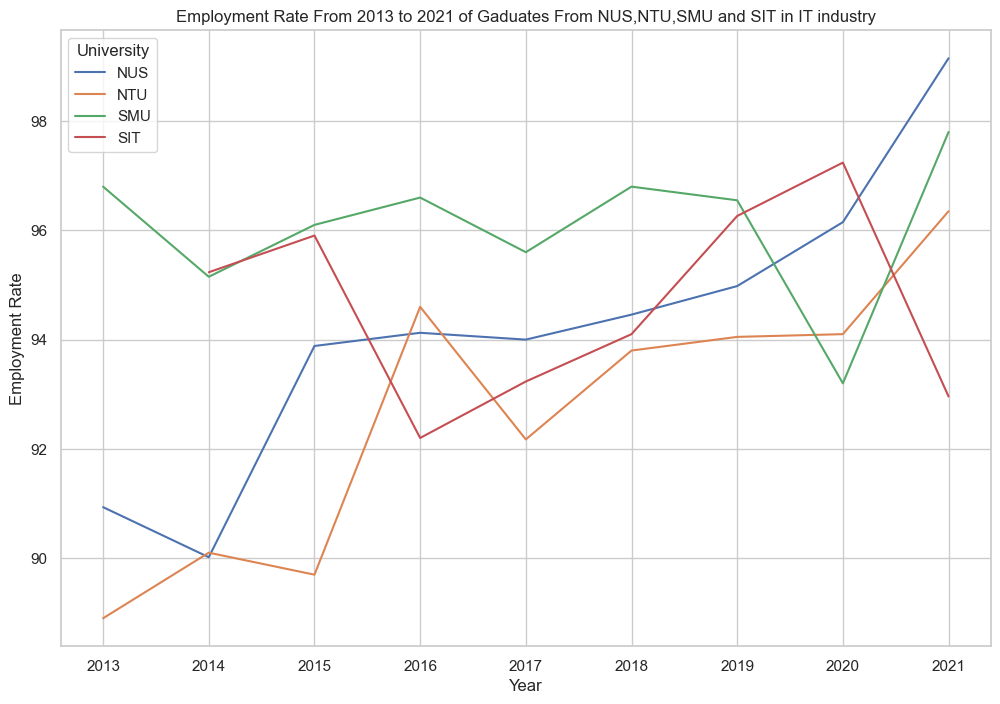

In [49]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=melted_df_employment_rate, x='year', y='employment_rate', hue='university')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.title('Employment Rate From 2013 to 2021 of Gaduates From NUS,NTU,SMU and SIT in IT industry')

# Display the legend
plt.legend(title='University', loc='upper left')

# Show the plot
plt.show()

**From the line graph, NUS has an increasing trend in the employment rate from the 2013 to 2021 and becoming the highest at 2021 but most of the time the employment rate of SMU has been the highest until 2019. NTU also has an increasing trend but it is only at the third place in 2021**

# Analyasis of GDP Growth Anuual Data set

In [67]:
df_GDP = pd.read_csv('./datasets/GDPAllCountries.csv')

In [68]:
df_GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.431482,-1.586575,-0.623626,1.719624,7.048533,2.381730,-2.302837,-23.982580,27.639357,10.458317
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.254876,7.965827,5.148206,4.579317,5.346211,...,4.216607,4.007577,2.965062,2.219015,2.571941,2.491355,2.040617,-2.799038,4.300441,3.435138
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.857727,3.772943,7.277246,5.412950,4.084749,...,6.107013,5.926266,2.813543,0.142092,2.286270,2.838829,3.200919,-0.938162,3.976317,3.766354
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.954613,4.822559,0.943572,-2.580111,-0.147150,-1.316362,-0.702273,-5.638215,1.199211,3.045403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.340800,3.348803,5.916232,5.571775,4.825656,3.406631,4.756801,-5.340275,10.745657,5.218604
262,"Yemen, Rep.",YEM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.823519,-0.188690,-27.994546,-9.375124,-5.071796,0.752448,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.844734,6.177931,7.373709,7.939609,6.122798,...,2.485468,1.413826,1.321862,0.664552,1.157947,1.556784,0.259936,-5.963358,4.703062,1.910406
264,Zambia,ZMB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.361382,-2.490839,3.272393,12.214048,16.647456,...,5.057232,4.697992,2.920375,3.776679,3.504336,4.034494,1.441306,-2.785055,6.234922,5.249622


In [69]:
df_GDP['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

**Since the interest is in Singpore, I will only select data row of singapore.**   

In [71]:
df_GDP_SG = df_GDP[df_GDP['Country Name']=='Singapore']

In [72]:
df_GDP_SG.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
208,Singapore,SGP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,8.13753,7.553444,10.040173,-3.103168,7.83426,...,4.817631,3.93554,2.976799,3.601656,4.544728,3.575433,1.331261,-3.901053,8.882354,3.646972


**I will extract the columns starting from the 2013 to 2021 because the employment rate of graduates data only have data from 2013 to 2021**

In [93]:
## Extracting data from 2013 to 2021
df_GDP_SG_2013_To_2021 = df_GDP_SG.iloc[:,df_GDP_SG.columns.get_loc('2013'):df_GDP_SG.columns.get_loc('2022')]

In [87]:
df_GDP_SG_2013_To_2021

,2013,2014,2015,2016,2017,2018,2019,2020,2021
208,4.817631,3.93554,2.976799,3.601656,4.544728,3.575433,1.331261,-3.901053,8.882354


In [94]:
## reshaping the data
df_GDP_SG_2013_To_2021 = pd.melt(df_GDP_SG_2013_To_2021, var_name='Year', value_name='GDP Growth Rate')

In [144]:
df_GDP_SG_2013_To_2021

,year,GDP Growth Rate
0,2013,4.817631
1,2014,3.935540
2,2015,2.976799
3,2016,3.601656
4,2017,4.544728
5,2018,3.575433
6,2019,1.331261
7,2020,-3.901053
8,2021,8.882354


In [141]:
df_GDP_SG_2013_To_2021.rename(columns={'Year':'year'},inplace=True)

## Producing Bar Graph to Compare the GDP growth Rate

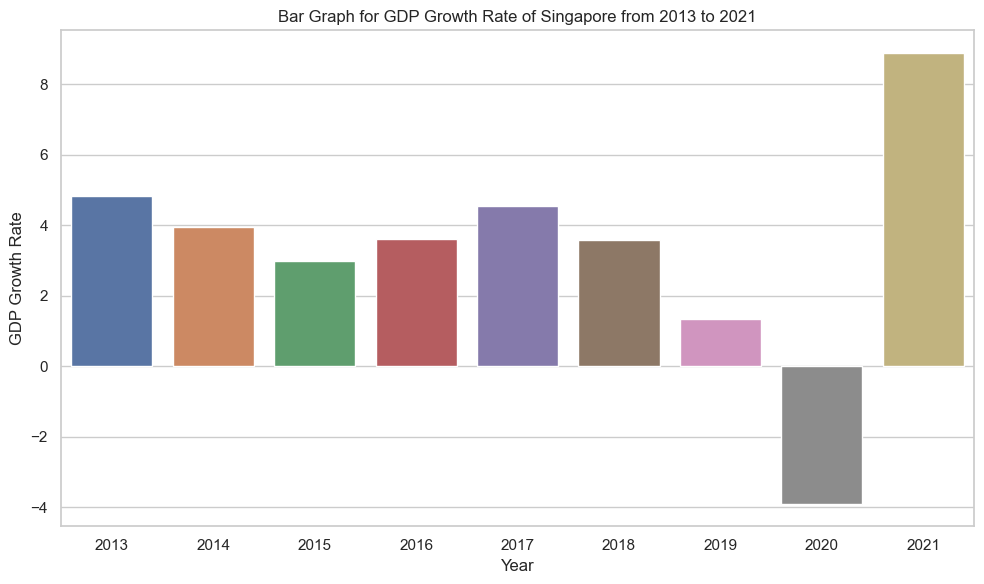

In [142]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_GDP_SG_2013_To_2021, x='year', y='GDP Growth Rate')

plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')
plt.title('Bar Graph for GDP Growth Rate of Singapore from 2013 to 2021')




plt.tight_layout()
plt.show()

**From the analysis of the bar graph, there is a decreasing trend from 2013 to 2015, and there is a significant decrease in 2019 and in 2020 the GDP growth rate becomes negative which means the GDP of 2020 is less than 2019. and there is a significant increase in GDP growth rate in 2021. The reducing GDP growth rate in 2019 and the negative GDP growth rate in 2021 may be because of Covid-19 pandemic. In January 2021 when the first case of Covid-19 was found, the enconomy of the Singpare becomes worse. This can be the main reason of negative GDP growth rate in Singapore**

### Analysis of Job Vacancy Data set 

In [127]:
df_jobVacancy = pd.read_csv('./datasets/jv_04_industry3_occ_yr.csv')
### https://stats.mom.gov.sg/Pages/JobVacancyTimeSeries.aspx

In [128]:
df_jobVacancy

,year,industry1,industry2,industry3,occupation1,job_vacancy
0,1998,total,total,total,total,18300
1,1998,total,total,total,"professional, managers, executive and technicians",4900
2,1998,total,total,total,"clerical, sales and services workers",6000
3,1998,total,total,total,"production and transport operators, cleaners a...",7400
4,1998,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",total,200
...,...,...,...,...,...,...
3271,2022,services,"community, social and personal services","other community, social and personal services","production and transport operators, cleaners a...",300
3272,2022,others,others,others,total,700
3273,2022,others,others,others,"professional, managers, executive and technicians",400
3274,2022,others,others,others,"clerical, sales and services workers",-


In [129]:
df_jobVacancy['occupation1'].unique()

array(['total', 'professional, managers, executive and technicians',
       'clerical, sales and services workers',
       'production and transport operators, cleaners and labourers'],
      dtype=object)

**So, the occupation1 column describes the postion of the jobs so I will just use total as job vacancy number.**

In [130]:
df_jobVacancy = df_jobVacancy[df_jobVacancy['occupation1']=='total']

In [131]:
df_jobVacancy.dtypes

year            int64
industry1      object
industry2      object
industry3      object
occupation1    object
job_vacancy    object
dtype: object

**So now I know year column is the interger and I can filter the data set from 2013 to 2021**

In [133]:
df_jobVacancy = df_jobVacancy[(df_jobVacancy['year']>2012) & (df_jobVacancy['year']<2022)]

In [134]:
df_jobVacancy

,year,industry1,industry2,industry3,occupation1,job_vacancy
1956,2013,total,total,total,total,55400
1960,2013,manufacturing,"food, beverages and tobacco","food, beverages and tobacco",total,700
1964,2013,manufacturing,"paper,rubber,plastic products and printing","paper,rubber,plastic products and printing",total,500
1968,2013,manufacturing,"petroleum, chemical and pharmaceutical products","petroleum, chemical and pharmaceutical products",total,500
1972,2013,manufacturing,"fabricated metal products, machinery and equip...","fabricated metal products, machinery and equip...",total,2100
...,...,...,...,...,...,...
3124,2021,services,"community, social and personal services",public administration and education,total,9200
3128,2021,services,"community, social and personal services",health and social services,total,5600
3132,2021,services,"community, social and personal services","arts, entertainment and recreation",total,1100
3136,2021,services,"community, social and personal services","other community, social and personal services",total,1500


In [135]:
df_jobVacancy['industry3'].unique()

array(['total', 'food, beverages and tobacco',
       'paper,rubber,plastic products and printing',
       'petroleum, chemical and pharmaceutical products',
       'fabricated metal products, machinery and equipment',
       'electronic, computer and optical products', 'transport equipment',
       'other manufacturing industries', 'construction',
       'wholesale trade', 'retail trade',
       'land transport and supporting services',
       'water transport and supporting services',
       'air transport and supporting services',
       'other transport and storage services', 'accommodation',
       'food and beverage services',
       'telecommunications, broadcasting and publishing',
       'it and other information services', 'financial services',
       'insurance services', 'real estate services',
       'legal, accounting and management services',
       'architectural and engineering services',
       'other professional services', 'security and investigation',
       'clean

**Since the analysis is for IT industry I will extract the data rows for IT industry** 

In [136]:
df_jobVacancy_IT=df_jobVacancy[df_jobVacancy['industry3']=="it and other information services"]

In [137]:
df_jobVacancy_IT.head(25)

,year,industry1,industry2,industry3,occupation1,job_vacancy
2028,2013,services,information and communications,it and other information services,total,1200
2160,2014,services,information and communications,it and other information services,total,1800
2292,2015,services,information and communications,it and other information services,total,2200
2424,2016,services,information and communications,it and other information services,total,2000
2556,2017,services,information and communications,it and other information services,total,2300
2688,2018,services,information and communications,it and other information services,total,3200
2820,2019,services,information and communications,it and other information services,total,3500
2952,2020,services,information and communications,it and other information services,total,4000
3084,2021,services,information and communications,it and other information services,total,7100


In [138]:
## dropping unnecessary columns
df_jobVacancy_IT=df_jobVacancy_IT.drop(columns=['industry1','industry2','industry3','occupation1'])

In [139]:
df_jobVacancy_IT

,year,job_vacancy
2028,2013,1200
2160,2014,1800
2292,2015,2200
2424,2016,2000
2556,2017,2300
2688,2018,3200
2820,2019,3500
2952,2020,4000
3084,2021,7100


**Now, I want to combine the df_jobVacancy_IT and df_df_GDP_SG_2013_To_2021 because I want to produce a compound chart so that I can find the relationship between GDP growth and job Vacancy(or in other words employment oppotunies)** 

In [148]:
df_GDP_SG_2013_To_2021.dtypes

year                object
GDP Growth Rate    float64
dtype: object

In [149]:
## changing the data type of year to integer
df_GDP_SG_2013_To_2021['year'] = pd.to_numeric(df_GDP_SG_2013_To_2021['year'])

In [147]:
df_jobVacancy_IT.dtypes

year            int64
job_vacancy    object
dtype: object

In [150]:
df_jobVacancyAndGDP = df_jobVacancy_IT.merge(df_GDP_SG_2013_To_2021,how='outer',on='year')

In [158]:
df_jobVacancyAndGDP

,year,job_vacancy,GDP Growth Rate
0,2013,1200,4.817631
1,2014,1800,3.935540
2,2015,2200,2.976799
3,2016,2000,3.601656
4,2017,2300,4.544728
5,2018,3200,3.575433
6,2019,3500,1.331261
7,2020,4000,-3.901053
8,2021,7100,8.882354


### Creating a compound Chart to find the relationship between job vacancy and GDP growth rate

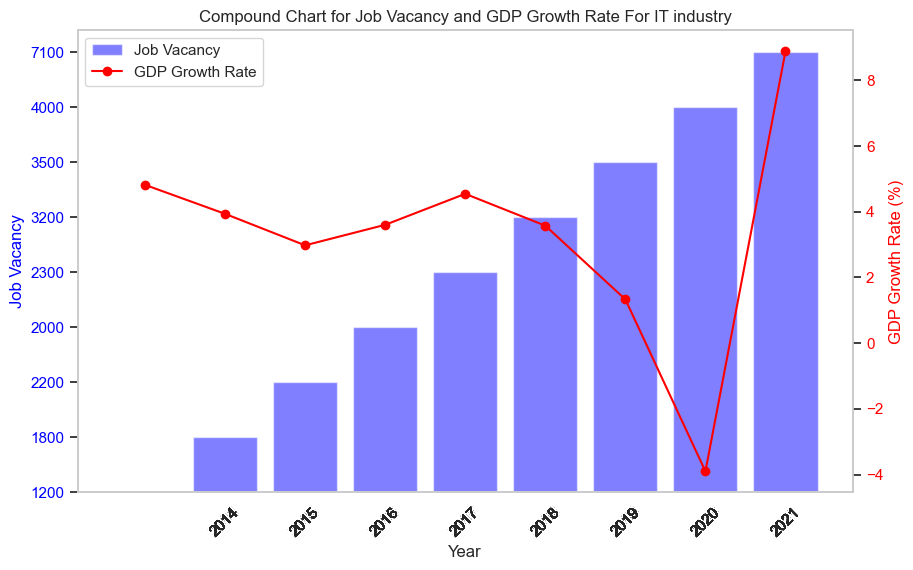

In [221]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# On the left y-axis, create a bar chart 
ax1.bar(df_jobVacancyAndGDP['year'], df_jobVacancyAndGDP['job_vacancy'], color='blue', alpha=0.5, label='Job Vacancy')
ax1.set_xlabel('Year')
ax1.set_ylabel('Job Vacancy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
## removing grid lines
ax1.grid(False)

# Creating and plotting a secondary y-axis (right) for GDP Growth Rate
ax2 = ax1.twinx()
ax2.plot(df_jobVacancyAndGDP['year'], df_jobVacancyAndGDP['GDP Growth Rate'], color='red', marker='o', label='GDP Growth Rate')
ax2.set_ylabel('GDP Growth Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2,labels + labels2, loc='upper left')
##setting the ticks at x - axis
ax1.set_xticks(df['year'])
ax1.set_xticklabels(df['year'], rotation=45) 
plt.title('Compound Chart for Job Vacancy and GDP Growth Rate For IT industry')
plt.show()

**From the analysis of the above compound graph, the expectation was that the decline in GDP growth rate should lower the job Vacancy because since the economic is declining, the job vacancy or job oppotunies should be decreased but here now that there is a gradual increase in job vacacy although the GDP growth is significantly decreased in 2019 and 2020**

## Performing Linear regression analysis for employment rate in IT industry, with Employment rate,dependent variable and GDP Growth Rate, Job Vacancy and University (categorical value) being the independent variable

In [169]:
## first merging two datasets (df_jobVacancyAndGDP and df_IT_employmentRate_FourUni)

df_merged = df_jobVacancyAndGDP.merge(df_IT_employmentRate_FourUni,on='year',how='outer')

In [170]:
df_merged

,year,job_vacancy,GDP Growth Rate,NUS,NTU,SMU,SIT
0,2013,1200,4.817631,90.933333,88.900000,96.80,NaN
1,2014,1800,3.935540,90.016667,90.100000,95.15,95.233333
2,2015,2200,2.976799,93.883333,89.697612,96.10,95.904802
3,2016,2000,3.601656,94.125000,94.600000,96.60,92.200000
4,2017,2300,4.544728,94.000000,92.173209,95.60,93.233333
5,2018,3200,3.575433,94.457143,93.800000,96.80,94.100000
6,2019,3500,1.331261,94.980000,94.050000,96.55,96.262881
7,2020,4000,-3.901053,96.150000,94.100000,93.20,97.240000
8,2021,7100,8.882354,99.150000,96.350000,97.80,92.960000


**Transform the data set so that each record will have job_vacancay, type of uni, GDP growth rate and employment rate**


In [172]:
df_transformed = df_merged.melt(id_vars=['year', 'job_vacancy', 'GDP Growth Rate'],var_name='University', value_name='Employment Rate')

In [173]:
df_transformed

,year,job_vacancy,GDP Growth Rate,University,Employment Rate
0,2013,1200,4.817631,NUS,90.933333
1,2014,1800,3.935540,NUS,90.016667
2,2015,2200,2.976799,NUS,93.883333
3,2016,2000,3.601656,NUS,94.125000
4,2017,2300,4.544728,NUS,94.000000
5,2018,3200,3.575433,NUS,94.457143
6,2019,3500,1.331261,NUS,94.980000
7,2020,4000,-3.901053,NUS,96.150000
8,2021,7100,8.882354,NUS,99.150000
9,2013,1200,4.817631,NTU,88.900000


In [176]:
#Handling missing value
df_transformed.isnull().sum()

year               0
job_vacancy        0
GDP Growth Rate    0
University         0
Employment Rate    1
dtype: int64

**In this case I will simply drop this null row because there is only row and by dropping this row, there will be not much loss of data for linear regression model training**

In [185]:
### dropping the null row
df_transformed.dropna(inplace=True)

In [186]:
df_transformed

,year,job_vacancy,GDP Growth Rate,University,Employment Rate
0,2013,1200,4.817631,NUS,90.933333
1,2014,1800,3.935540,NUS,90.016667
2,2015,2200,2.976799,NUS,93.883333
3,2016,2000,3.601656,NUS,94.125000
4,2017,2300,4.544728,NUS,94.000000
5,2018,3200,3.575433,NUS,94.457143
6,2019,3500,1.331261,NUS,94.980000
7,2020,4000,-3.901053,NUS,96.150000
8,2021,7100,8.882354,NUS,99.150000
9,2013,1200,4.817631,NTU,88.900000


In [193]:
## renaming the transformed data 
df_transformed=df_transformed.rename(columns={'GDP Growth Rate':"GDP_Growth_Rate",'Employment Rate':'Employment_Rate'})


In [196]:
df_transformed

,year,job_vacancy,GDP_Growth_Rate,University,Employment_Rate
0,2013,1200,4.817631,NUS,90.933333
1,2014,1800,3.935540,NUS,90.016667
2,2015,2200,2.976799,NUS,93.883333
3,2016,2000,3.601656,NUS,94.125000
4,2017,2300,4.544728,NUS,94.000000
5,2018,3200,3.575433,NUS,94.457143
6,2019,3500,1.331261,NUS,94.980000
7,2020,4000,-3.901053,NUS,96.150000
8,2021,7100,8.882354,NUS,99.150000
9,2013,1200,4.817631,NTU,88.900000


In [199]:
## Before creating a model, I first check the data types of the columns

df_transformed.dtypes

year                 int64
job_vacancy         object
GDP_Growth_Rate    float64
University          object
Employment_Rate    float64
dtype: object

**Now, I need to change the data type of job_vacancy column**

In [201]:
df_transformed['job_vacancy'] =pd.to_numeric(df_transformed['job_vacancy'])

In [202]:
df_transformed.dtypes

year                 int64
job_vacancy          int64
GDP_Growth_Rate    float64
University          object
Employment_Rate    float64
dtype: object

In [203]:
## Creating the linear regression model 
import statsmodels.api as sm
import statsmodels.formula.api as smf
## fitting model
employmentModel = smf.ols(formula='Employment_Rate ~ job_vacancy + GDP_Growth_Rate + C(University)', data=df_transformed).fit()

model_summary = employmentModel.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:        Employment_Rate   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     5.753
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000832
Time:                        10:47:59   Log-Likelihood:                -68.074
No. Observations:                  35   AIC:                             148.1
Df Residuals:                      29   BIC:                             157.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               90.7586 

**From the model summary, the following insights are gained  :
Since R-squared: 0.498, this model can only explain the about 49.8% of the employment rate which means this is not a good model.  From Universities aspect, the coefficient of SMU is highest with 3.42% which means there is a high chance of employment rate if you attend SMU compared to other three universities, NTU,SIT and NUS.   
For job_vacancy, it seems to have a good predictor for the model because p=0.001 which is less than 0.05. This means between job_vacancy and employment rate has linear relationship or job vacancy has some impact on employment rate.   
For GDP_Growth_Rate, the coefficient is minus which does not make sense because what we expect is that the higher the GDP Growth Rate, there shold be higher graduate rates but the coefficient shows the opposite. So, this may be because in 2020 the employment rate does not decreases significantly although the GDP growth rate becomes negative. So, I will remove the data in 2020 and do the model again and compare it with this model.**  



**Now I will create a residual plot to get a more inside of the linear regression model**

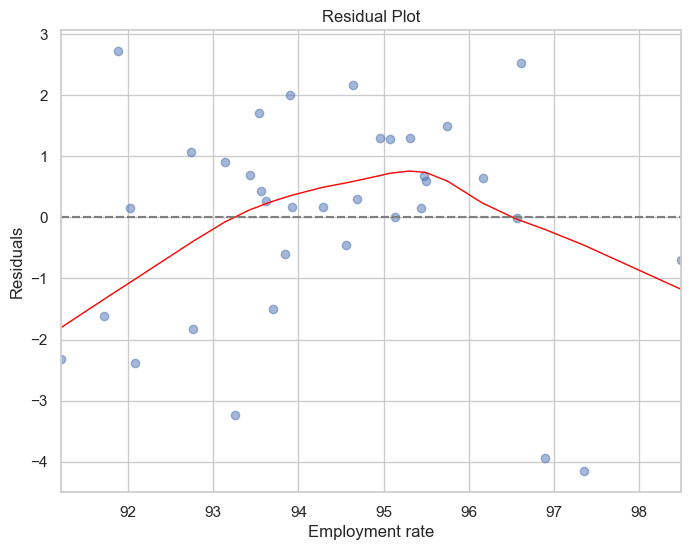

In [220]:
# Calculate residuals
residuals = employmentModel.resid

# Calculate fitted values
fitted_values = employmentModel.fittedvalues

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True,line_kws={'color': 'red', 'lw': 1},
              scatter_kws={'alpha': 0.5})

plt.title('Residual Plot')
plt.xlabel('Employment rate')
plt.ylabel('Residuals')

# Adding a horizontal line at 0 to indicate no error
plt.axhline(y=0, color='grey', linestyle='dashed')

plt.show()

**Fro the residual plot, the spread of residual poinst are not constant around the zero horizontal line so this model is not a good fit. Morevoer the outliers can be seen near 3 and -4 which means that there are certain outliers in the data that can affect the model training.**

### Removing the data of 2020 which can be the reason of negative coefficient of GDP growth rate

In [215]:
## now the data with year 2020 is removed
df_removed_2020 = df_transformed[(df_transformed['year']!=2020)]

In [216]:
df_removed_2020

,year,job_vacancy,GDP_Growth_Rate,University,Employment_Rate,Predicted
0,2013,1200,4.817631,NUS,90.933333,92.758778
1,2014,1800,3.935540,NUS,90.016667,93.258890
2,2015,2200,2.976799,NUS,93.883333,93.623119
3,2016,2000,3.601656,NUS,94.125000,93.428908
4,2017,2300,4.544728,NUS,94.000000,93.563879
5,2018,3200,3.575433,NUS,94.457143,94.284626
6,2019,3500,1.331261,NUS,94.980000,94.684606
8,2021,7100,8.882354,NUS,99.150000,96.617374
9,2013,1200,4.817631,NTU,88.900000,91.211595
10,2014,1800,3.935540,NTU,90.100000,91.711706


In [218]:
## fitting model without 2020 Data
employmentModelWithout2020Data = smf.ols(formula='Employment_Rate ~ job_vacancy + GDP_Growth_Rate + C(University)', data=df_removed_2020).fit()

model_summary1 = employmentModelWithout2020Data.summary()
print(model_summary1)

                            OLS Regression Results                            
Dep. Variable:        Employment_Rate   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     7.639
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           0.000179
Time:                        12:28:17   Log-Likelihood:                -57.428
No. Observations:                  31   AIC:                             126.9
Df Residuals:                      25   BIC:                             135.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               91.0973 

**So the data of GDP growth rate negative cannot be the reason of negative coeffiecient of GDP growth rate because even after removing the rows of 2020 and train the model again the coefficient is negative so there may be other factors need to be considered but the model has improved a little with the R2 squared value 0.604**

**So, now I will try to find the impact of GDP growth rate alone on employment rate**

In [224]:
modelForGDP = smf.ols(formula='Employment_Rate ~ GDP_Growth_Rate', data=df_removed_2020).fit()


print(modelForGDP.summary())

                            OLS Regression Results                            
Dep. Variable:        Employment_Rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8747
Date:                Mon, 05 Feb 2024   Prob (F-statistic):              0.357
Time:                        13:49:54   Log-Likelihood:                -71.341
No. Observations:                  31   AIC:                             146.7
Df Residuals:                      29   BIC:                             149.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          93.4209      1.017     

**From the analysis of the above the linear regression analysis for Employment rate vs GDP growth rate, the model can only explain 0.029 percent of the data and the p-value is also too high with the value 0.357, meaning that GDP grwoth rate has no impact on the employment rate. Now, I will try a regression plot to visualize it**

**Creating regression plot for employment rate vs GDP growth rate**

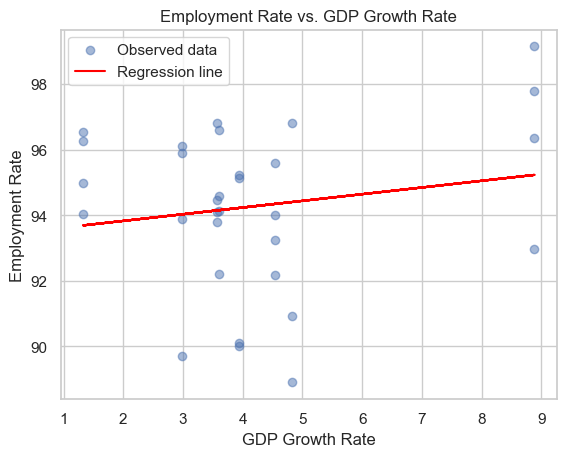

In [229]:
import numpy as np
plt.scatter(df_removed_2020['GDP_Growth_Rate'], df_removed_2020['Employment_Rate'], alpha=0.5, label='Observed data')

# Calculate the values for the regression line
# Using the intercept and coefficient from your model summary
intercept = 93.4209
slope = 0.2038
x_for_best_fit_line = np.array(df_removed_2020['GDP_Growth_Rate'])
y_for_best_fit_line = intercept + slope * x_for_best_fit_line

# Plot the regression line
plt.plot(x_for_best_fit_line, y_for_best_fit_line, color='red', label='Regression line')

# Adding labels and title
plt.xlabel('GDP Growth Rate')
plt.ylabel('Employment Rate')
plt.title('Employment Rate vs. GDP Growth Rate')
plt.legend()

# Show the plot
plt.show()

**So, from the regression plot, the data poinst are scattered randomly and no relationship can be seen between GDP growth rate and employment rate and also regression line does not explain or cannot predict almost all values. So, from the analysis, the GDP growth rate has no impact on the employment rate.**

## Conclusion for analysis question 

**From the boxplot, line graph and from the linear regression analysis, SMU has high employment rate and high chance of employment. But for GDP growth rate, the p-value is 0.415, which means GDP growth rate has no impact on the employment rate and the coefficient is also negative which makes no sense. But job vacancy has certain linear relationship because its p-value is 0.001 < 0.005 with the coefficient of 0.0007 which means if the other factors remain constant,for every job vacacny increase the employment rate will increase by 0.0007 percent.  
So To answer the analysis question, SMU has high chance of employment rate followed by SIT and NUS  and the higher the job vacancy the greater will be the employment rate for IT industry.**